###**GROUP 9**

###**Aim:** The aim is to detect murmurs and distingulish normal from abnormal clinical outcomes by analyzing heart sound recordings taken from multiple locations on the body using a digital stethoscope and to implement ResNet50 for this problem statement.



In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/training_data'

####**Visualization**

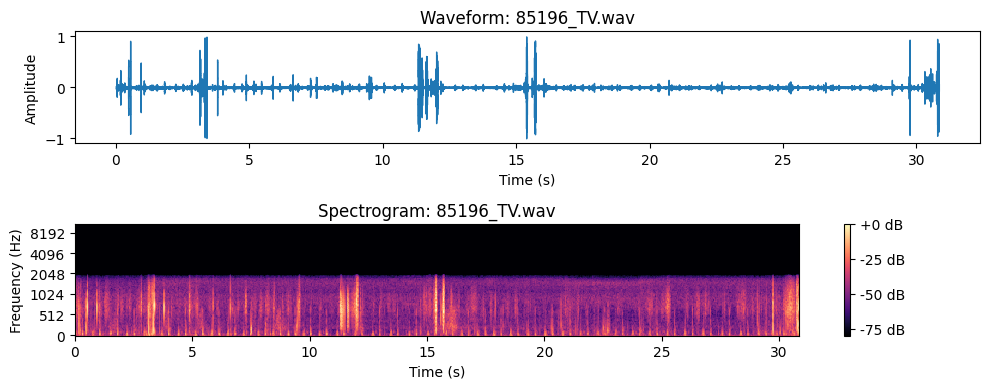

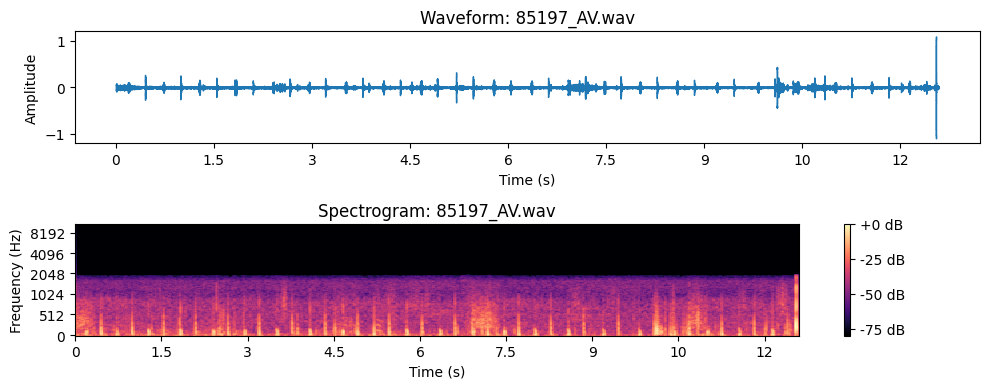

In [ ]:
# Get the list of files in the directory
files = os.listdir(data)

# Take the first 2 audio files for visualization
files_to_visualize = [file for file in files if file.endswith(".wav")][:2]

# Visualize waveforms and spectrograms for each audio file
for file_name in files_to_visualize:
    file_path = os.path.join(data, file_name)

    # Load the audio file
    y, sr = librosa.load(file_path)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.title(f'Spectrogram: {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(format='%+2.0f dB')

    # save_path = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/spec'
    # os.makedirs(save_path, exist_ok=True)
    # plt.savefig(os.path.join(save_path, f"spec_{file_name.split('_')[0]}.jpg"))


    plt.tight_layout()
    plt.show()

#### **Generating Mel Spectrograms From Audio Data**

In [ ]:
file_path = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/training_data'


output_dir = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/specto'


os.makedirs(output_dir, exist_ok=True)

for i, audio_file in enumerate(os.listdir(file_path)):
    if audio_file.endswith('.wav'):

        original_id, _ = os.path.splitext(audio_file)


        file_path_full = os.path.join(file_path, audio_file)
        y, sr = librosa.load(file_path_full, sr=None)


        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)


        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')  # Turn off axis labels
        plt.savefig(os.path.join(output_dir, f'{original_id}'), bbox_inches='tight', pad_inches=0)
        plt.close()

In the above code snippet the audio files are processed to extract the information. Using librosa library, the audio files are converted into Mel spectrograms, which represent the frequency content over time. These spectrograms are then saved as images for further process in the pipeline.

#### **Generating Waveform Plots in the Frequency-Time Domain**

In [ ]:
output_dir_freq_time = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/frequency-time'


os.makedirs(output_dir_freq_time, exist_ok=True)

for i, audio_file in enumerate(os.listdir(file_path)):
    if audio_file.endswith('.wav'):

        file_parts = os.path.splitext(audio_file)[0].split('_')
        unique_id = file_parts[0]
        label = file_parts[1]

        file_path_full = os.path.join(file_path, audio_file)
        y, sr = librosa.load(file_path_full, sr=None)

        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.savefig(os.path.join(output_dir_freq_time, f'{unique_id}_{label}_frequency_time.png'))
        plt.close()

In the above code snippet the audio files are processed to generate visual representations of the audio waveform in the frequency-time domain using librosa library.

In [ ]:
# Directory where the spectrograms are stored
spectrogram_dir = '/content/drive/MyDrive/AI_Health_Nehha/extracted_train_data/specto'

# List all files in the spectrogram directory
all_spectrogram_files = os.listdir(spectrogram_dir)

# Create a new DataFrame to store file paths, labels, and murmurs
files_and_labels = []

In [ ]:
print(all_spectrogram_files)

['50284_TV.png', '50281_MV.png', '50280_PV.png', '50278_TV.png', '50284_AV.png', '50281_TV.png', '50280_TV.png', '50284_MV.png', '50278_PV.png', '50281_PV.png', '50284_PV.png', '50295_TV.png', '50291_PV.png', '50295_AV.png', '50291_MV.png', '50291_AV.png', '50289_PV.png', '50295_MV.png', '50289_AV.png', '50296_AV.png', '50289_TV.png', '50295_PV.png', '50296_MV.png', '50289_MV.png', '50297_MV.png', '50296_TV.png', '50298_TV.png', '50297_PV.png', '50298_MV.png', '50297_AV.png', '50299_AV.png', '50299_TV.png', '50299_PV.png', '50298_PV.png', '50297_TV.png', '50296_PV.png', '50299_MV.png', '50306_AV.png', '50311_TV.png', '50306_TV.png', '50300_MV.png', '50303_MV.png', '50311_MV.png', '50306_MV.png', '50306_PV.png', '50304_PV.png', '50300_AV.png', '50303_PV.png', '50303_AV.png', '50311_PV.png', '50312_AV.png', '50317_TV.png', '50316_AV.png', '50317_PV.png', '50312_TV.png', '50312_PV.png', '50312_MV.png', '50316_MV.png', '50314_AV.png', '50317_AV.png', '50314_MV.png', '50314_TV.png', '50314_

In [ ]:
# Loading the CSV File
data_df = pd.read_csv('/content/drive/MyDrive/AI_Health_Nehha/training_data.csv')

In [ ]:
data_df.head()

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


In [ ]:
# Assuming you have already loaded the data into a DataFrame called 'df'
print(data_df.iloc[3].to_frame().T.reset_index().rename(columns={'index': 'Index'}).to_string(index=False, header=True))

 Index Patient ID   Locations   Age  Sex Height Weight Pregnancy status  Murmur Murmur locations Most audible location Systolic murmur timing Systolic murmur shape Systolic murmur grading Systolic murmur pitch Systolic murmur quality Diastolic murmur timing Diastolic murmur shape Diastolic murmur grading Diastolic murmur pitch Diastolic murmur quality Campaign Additional ID
     3      13918 AV+PV+TV+MV Child Male   98.0   15.9            False Present               TV                    TV           Holosystolic               Plateau                    I/VI                   Low                 Blowing                     NaN                    NaN                      NaN                    NaN                      NaN   CC2015           NaN


In [ ]:
data_df.iloc[3]

Patient ID                         13918
Locations                    AV+PV+TV+MV
Age                                Child
Sex                                 Male
Height                              98.0
Weight                              15.9
Pregnancy status                   False
Murmur                           Present
Murmur locations                      TV
Most audible location                 TV
Systolic murmur timing      Holosystolic
Systolic murmur shape            Plateau
Systolic murmur grading             I/VI
Systolic murmur pitch                Low
Systolic murmur quality          Blowing
Diastolic murmur timing              NaN
Diastolic murmur shape               NaN
Diastolic murmur grading             NaN
Diastolic murmur pitch               NaN
Diastolic murmur quality             NaN
Campaign                          CC2015
Additional ID                        NaN
Name: 3, dtype: object

In [ ]:
#data_df['Patient ID']
type(data_df[data_df['Patient ID'] == 50319].iloc[0,8])

str

In [ ]:
default_loc = ['MV', 'AV', 'TV', 'PV']

#### Creating DataFrame to organize File Labels and Murmur Locations

In [ ]:
files_labels = pd.DataFrame()
files_labels['file_name'] = ''
files_labels['labels'] = ''
files_labels['murmur_location'] = ''
for filename in all_spectrogram_files:
  filename_parts = filename.split('_')
  patient_id = filename_parts[0]
  murmur_loc_str = filename_parts[1].split('.')[0]
  record = []
  if murmur_loc_str in str(data_df[data_df['Patient ID'] == int(patient_id)].iloc[0,8]):
    record = [filename,1,murmur_loc_str]
  else:
    record = [filename,0,murmur_loc_str]
  files_labels.loc[len(files_labels)] = record



The above code snippet creates a DataFrame to organize file names, their associated labels and location of murmur within the audio files. It iterates through a list of filenames, extracting the info such as patient ID and murmur locations.

For each filename, it splits the filename into parts to obtain the Patient ID and murmur location. If the murmur location matches the corresponding patient's record in the dataset, it labels the file as murmur present(1), otherwise it labels it as murmur absent(0).

This process is carried out to ensure that each file is correctly labeled based on the presence or absence of murmurs at that specified location within the audio data, which facilitaes for further analysis and classification tasks.

In [ ]:
len(files_labels)

3163

In [ ]:
# print(files_and_labels)
files_labels

,file_name,labels,murmur_location
0,50284_TV.png,0,TV
1,50281_MV.png,0,MV
2,50280_PV.png,1,PV
3,50278_TV.png,0,TV
4,50284_AV.png,0,AV
...,...,...,...
3158,85278_PV.png,0,PV
3159,85282_PV.png,0,PV
3160,85279_TV.png,0,TV
3161,85279_PV.png,0,PV


In [ ]:
files_labels.to_csv("data_records.csv", index = False)

In [ ]:
# Counting empty murmur locations in files_lables
empty_list_count = files_labels['murmur_location'].apply(lambda x: len(x) == 0).sum()
empty_list_count

0

In [ ]:
files_labels = files_labels[files_labels['murmur_location'].apply(lambda x: len(x) > 0)]
files_labels

,file_name,labels,murmur_location
0,50284_TV.png,0,TV
1,50281_MV.png,0,MV
2,50280_PV.png,1,PV
3,50278_TV.png,0,TV
4,50284_AV.png,0,AV
...,...,...,...
3158,85278_PV.png,0,PV
3159,85282_PV.png,0,PV
3160,85279_TV.png,0,TV
3161,85279_PV.png,0,PV


In [ ]:
class Sound_data(Dataset):
  def __init__(self, dataframe, transform=None):
    self.dataframe = dataframe
    self.transform = transform

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    img_name = self.dataframe.iloc[idx, 0]
    img_name = os.path.join(spectrogram_dir, img_name)
    image = Image.open(img_name).convert('RGB')
    label = self.dataframe.iloc[idx, 1]

    if self.transform:
      image = self.transform(image)

    return image, label

In [ ]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224 x 224 (Resnet50 default input image size )
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])


dataset = Sound_data(dataframe=files_labels, transform=transform) #'files_labels' is the DataFrame with file paths and labels


total_size = len(dataset)
train_size = int(0.7 * total_size)
test_val_size = total_size - train_size
val_size = int(0.5 * test_val_size)  # Approximately 15% of the total size
test_size = test_val_size - val_size  # The remainder to the test set

train_dataset, test_val_dataset = random_split(dataset, [train_size, test_val_size])
val_dataset, test_dataset = random_split(test_val_dataset, [val_size, test_size])


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


**Implementation of Resnet50**

In [ ]:
# Load a pretrained ResNet50 model
model = models.resnet50(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 150MB/s]


In [ ]:
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

num_epochs = 20
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
            dataloader = train_loader
        else:
            model.eval()   # Set model to evaluate mode
            dataloader = val_loader

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)


                if phase == 'train':
                    loss.backward()
                    optimizer.step()


            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()

        if phase == 'train':
            scheduler.step()

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects / len(dataloader.dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} {phase} Acc: {epoch_acc:.4f}')

    print()

print('Training complete')

Epoch 1/20
----------
train Loss: 0.4164 train Acc: 0.8550
val Loss: 0.5015 val Acc: 0.8333

Epoch 2/20
----------
train Loss: 0.3426 train Acc: 0.8785
val Loss: 0.4226 val Acc: 0.8608

Epoch 3/20
----------
train Loss: 0.3294 train Acc: 0.8785
val Loss: 0.4090 val Acc: 0.8608

Epoch 4/20
----------
train Loss: 0.3078 train Acc: 0.8875
val Loss: 0.3682 val Acc: 0.8671

Epoch 5/20
----------
train Loss: 0.2822 train Acc: 0.9002
val Loss: 0.3730 val Acc: 0.8755

Epoch 6/20
----------
train Loss: 0.2791 train Acc: 0.8975
val Loss: 0.3948 val Acc: 0.8650

Epoch 7/20
----------
train Loss: 0.2437 train Acc: 0.9128
val Loss: 0.5388 val Acc: 0.8608

Epoch 8/20
----------
train Loss: 0.2206 train Acc: 0.9155
val Loss: 0.3908 val Acc: 0.8586

Epoch 9/20
----------
train Loss: 0.1574 train Acc: 0.9481
val Loss: 0.4223 val Acc: 0.8629

Epoch 10/20
----------
train Loss: 0.1284 train Acc: 0.9557
val Loss: 0.4665 val Acc: 0.8565

Epoch 11/20
----------
train Loss: 0.0890 train Acc: 0.9743
val Loss:

              precision    recall  f1-score   support

      Absent       0.93      0.97      0.95       412
     Present       0.69      0.49      0.57        63

    accuracy                           0.90       475
   macro avg       0.81      0.73      0.76       475
weighted avg       0.89      0.90      0.90       475



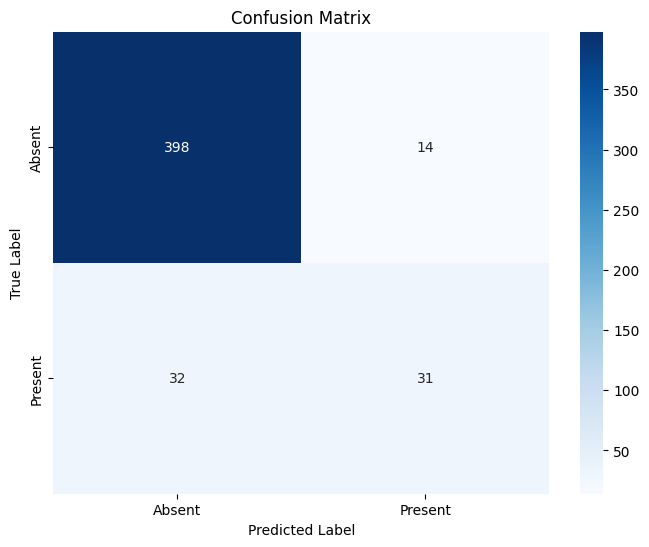

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()

with torch.no_grad():
    test_preds = []
    test_labels = []


    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.view(-1).cpu().numpy())
        test_labels.extend(labels.view(-1).cpu().numpy())

# classification report
print(classification_report(test_labels, test_preds, target_names=['Absent', 'Present']))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Absent', 'Present'], yticklabels=['Absent', 'Present'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### **Analysis**
Based on the evaluation metrics and confusion matrix, Resnet50 appears to perform well in identifying the "Absent" class, with high precision, recall, and F1-Score. However, its performance in identifying the "Present" class is relatively weaker, with lower precision, recall, and F1-score. This could be due to class imbalance, where the "Absent" class has significantly more instances than the "Present" class.

The analysis suggests that, the Resnet50 has reasonably good overall accuracy, still this problem needs improvement particularly in correctly identifying instances of the minority "Present" Class.